In [74]:
import numpy as np
import healpy as hp
NSIDE = 8

In [75]:
np_dtype = np.float64
data_7 = np.genfromtxt('./data/events/IC86_VII_exp.csv', names=True, dtype=np_dtype)
data_6 = np.genfromtxt('./data/events/IC86_VI_exp.csv', names=True, dtype=np_dtype)
data_5 = np.genfromtxt('./data/events/IC86_V_exp.csv', names=True, dtype=np_dtype)
data_4 = np.genfromtxt('./data/events/IC86_IV_exp.csv', names=True, dtype=np_dtype)
data_3 = np.genfromtxt('./data/events/IC86_III_exp.csv', names=True, dtype=np_dtype)
data_2 = np.genfromtxt('./data/events/IC86_II_exp.csv', names=True, dtype=np_dtype)
data_1 = np.genfromtxt('./data/events/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
data_7y = np.concatenate((data_7, data_6, data_5, data_4, data_3, data_2, data_1))

In [76]:
## Ensure that everything got put together correctly...
print(len(data_7y))
print(len(data_1)+len(data_2)+len(data_3)+len(data_4)+len(data_5)+len(data_6)+len(data_7))
data_7y

897406
897406


array([(57891.17694387, 2.9 , 0.89, 343.245,  13.768,  46.287, 103.86 ),
       (57891.18095108, 3.13, 0.35, 127.003,  35.576, 263.912, 125.521),
       (57891.18877491, 4.7 , 0.2 , 216.473, -23.266, 177.292,  66.652),
       ...,
       (56062.4089819 , 2.79, 3.03, 240.151,  51.702, 230.512, 141.666),
       (56062.41103019, 3.42, 0.74, 245.893,  37.043, 225.485, 127.012),
       (56062.41621633, 2.84, 0.2 , 346.941,  67.104, 126.317, 157.163)],
      dtype=[('MJDdays', '<f8'), ('log10EGeV', '<f8'), ('AngErrdeg', '<f8'), ('RAdeg', '<f8'), ('Decdeg', '<f8'), ('Azimuthdeg', '<f8'), ('Zenithdeg', '<f8')])

Using  768  pixels
Plotted points:  895288


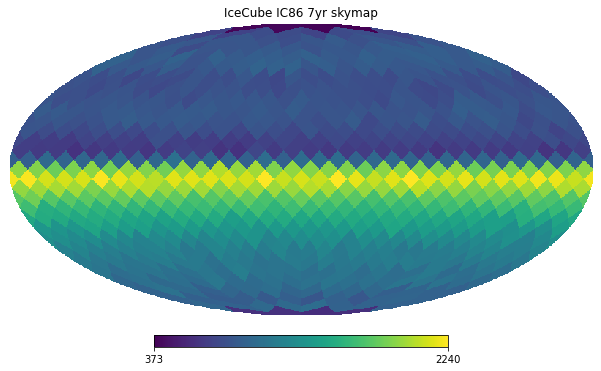

In [77]:
print('Using ',hp.nside2npix(NSIDE), ' pixels')
## seed skymap with 0 counts in each bin
skymap = np.zeros(hp.nside2npix(NSIDE))
n_plot = 0

for ev in data_7y:
    if np.abs(ev["Decdeg"]) < 85.0:   # must avoid poles for later analysis/scrambling
        # shift dec to 0-180 instead of -90,90
        binnum = hp.ang2pix(NSIDE, (np.radians(ev["Decdeg"])+np.pi/2.0), np.radians(ev["RAdeg"]))
        skymap[binnum] += 1
        n_plot += 1
hp.mollview(skymap, title="IceCube IC86 7yr skymap")
print('Plotted points: ', n_plot)

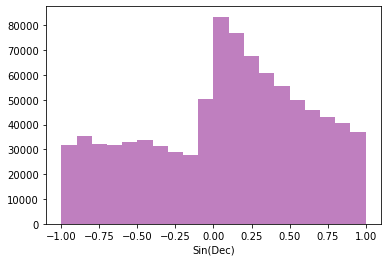

In [80]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

sindec = np.sin(np.radians(data_7y['Decdeg']))
plt.hist(sindec, 20, facecolor='purple', alpha=0.5)
plt.xlabel('Sin(Dec)')
plt.show()

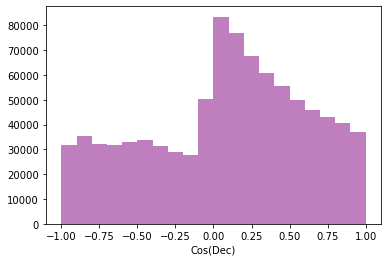

In [81]:
coszen = np.cos(np.radians(data_7y['Zenithdeg']))
plt.hist(sindec, 20, facecolor='purple', alpha=0.5)
plt.xlabel('Cos(Dec)')
plt.show()

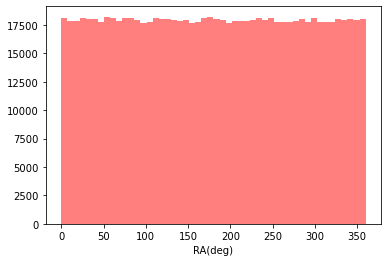

In [82]:
plt.hist(data_7y['RAdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('RA(deg)')
plt.show()

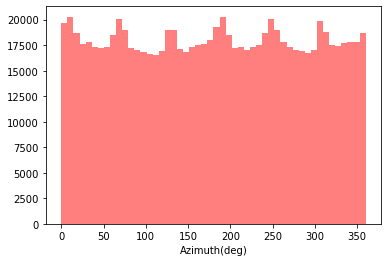

In [83]:
plt.hist(data_7y['Azimuthdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('Azimuth(deg)')
plt.show()

In [84]:
## Calculate the exposure in time of this sample using the 'uptime' data
exposure_7 = np.genfromtxt('./data/uptime/IC86_VII_exp.csv', names=True, dtype=np_dtype)
exposure_6 = np.genfromtxt('./data/uptime/IC86_VI_exp.csv', names=True, dtype=np_dtype)
exposure_5 = np.genfromtxt('./data/uptime/IC86_V_exp.csv', names=True, dtype=np_dtype)
exposure_4 = np.genfromtxt('./data/uptime/IC86_IV_exp.csv', names=True, dtype=np_dtype)
exposure_3 = np.genfromtxt('./data/uptime/IC86_III_exp.csv', names=True, dtype=np_dtype)
exposure_2 = np.genfromtxt('./data/uptime/IC86_II_exp.csv', names=True, dtype=np_dtype)
exposure_1 = np.genfromtxt('./data/uptime/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
exposure_7y = np.concatenate((exposure_7, exposure_6, exposure_5, exposure_4, exposure_3, exposure_2, exposure_1))

In [85]:
exposure_7y


array([(57891.1699074 , 57891.50291666), (57891.50484953, 57891.83756944),
       (57891.83756944, 57892.17101851), ...,
       (56061.83694444, 56062.17031249), (56062.17100694, 56062.33961805),
       (56062.34666666, 56062.41831018)],
      dtype=[('MJD_startdays', '<f8'), ('MJD_stopdays', '<f8')])

In [86]:
total_livetime = 0
for run in exposure_7y:
    total_livetime += run['MJD_stopdays'] - run['MJD_startdays']
    
print(total_livetime, 'days')

2531.882976139459 days
